In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../model/main_model')

from some_functions import get_db


art_db = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\art_clean_wt_all_popularity.csv')
user_db = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\readers.csv')

In [2]:
art_db.head(1)

,nzz_id,author,catchline,content,content_length,department,lead_text,pub_date,title,popularity,author_occurences,author_popularity,department_occurences,department_popularity
0,ld.149648,Claudia Gabriel,Obligationenfonds mit fixer Laufzeit,Obligationenfonds mit fixer Laufzeit Es gi...,704,Finanzen,Die Idee ist gut: Statt einer einzigen Obligat...,2017-03-09 08:01:21.000,Es gibt noch interessante Varianten,0.009009,57,0.157593,597,0.904941


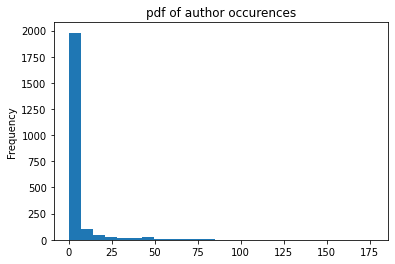

In [45]:
s = pd.Series(art_db.groupby('author')['author_occurences'].min())
s.plot.hist(bins=25)
plt.title('pdf of author occurences')
plt.show()

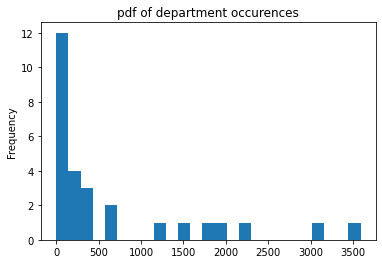

In [43]:
s = pd.Series(art_db.groupby('department')['department_occurences'].min())
s.plot.hist(bins=25)
plt.title('pdf of department occurences')
plt.show()

## Wykres rozproszenia x - użytkownicy, y - artykuły

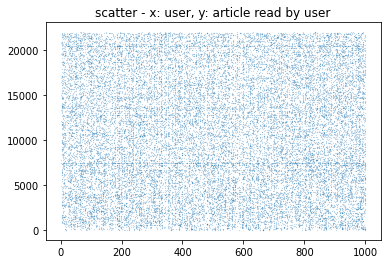

In [42]:
x = list(user_db.iloc[:,0])
y = [art_db[ art_db['nzz_id'] == it].index for it in list(user_db.iloc[:,1])]
Z = []
for it in y:
    try:
        Z.append(it[0])
    except:
        Z.append(0)
plt.scatter(x,Z,s=0.01)
plt.title('scatter - x: user, y: article read by user')
plt.show()

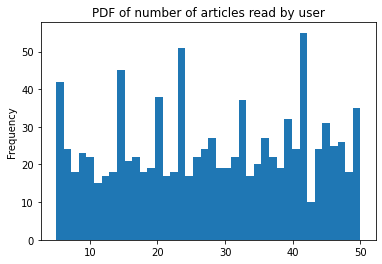

In [41]:
s = pd.Series(user_db.groupby('user_id')['nzz_id'].count())
s.plot.hist(bins=40)
plt.title('PDF of number of articles read by user')
plt.show()

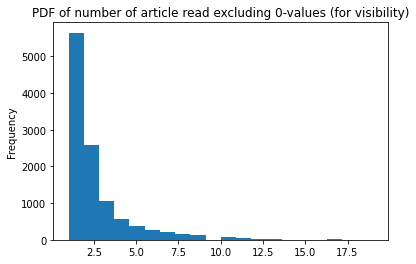

In [40]:
s = pd.Series(user_db.groupby('nzz_id')['user_id'].count())
s[s<20.5].plot.hist(bins=20)
plt.title('PDF of number of article read excluding 0-values (for visibility)')
plt.show()

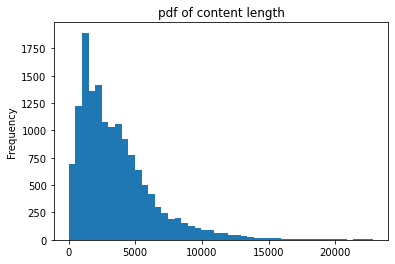

In [65]:
def len_content(x):
    if isinstance(x, str):
        return len(x)
    else:
        return x

s = art_db['content'].apply(lambda x: len_content(x))
s[s<23000].plot.hist(bins=46)
plt.title('pdf of content length')
plt.show()

# rozkład gamma najprawdopodobniej